# Load Data

In [1]:
from google.colab import drive

drive.mount("/content/drive")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import seaborn as sns
import glob
import os


BASE_DIR = "/content/drive/MyDrive"
FOLDERNAME = "Datathon2026/data" 
DATA_DIR = f"{BASE_DIR}/{FOLDERNAME}"

files = glob.glob(f"{DATA_DIR}/annual_aqi_by_county_*.zip")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
aqi_all = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)

aqi_all.head()


,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days PM2.5,Days PM10
0,Alabama,Baldwin,2001,283,174,95,12,2,0,0,159,84,46,0,0,203,80,0
1,Alabama,Clay,2001,279,145,119,14,1,0,0,164,87,49,0,0,197,82,0
2,Alabama,Colbert,2001,100,36,64,0,0,0,0,90,78,55,0,0,0,100,0
3,Alabama,DeKalb,2001,365,198,136,28,3,0,0,164,97,47,0,0,292,73,0
4,Alabama,Elmore,2001,241,165,63,12,1,0,0,154,80,43,0,0,241,0,0


In [3]:
aqi_all.to_csv(f"{DATA_DIR}/data.csv", index=False)

In [4]:
df = pd.read_csv(f"{DATA_DIR}/data.csv")

In [5]:
df.head()

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days PM2.5,Days PM10
0,Alabama,Baldwin,2001,283,174,95,12,2,0,0,159,84,46,0,0,203,80,0
1,Alabama,Clay,2001,279,145,119,14,1,0,0,164,87,49,0,0,197,82,0
2,Alabama,Colbert,2001,100,36,64,0,0,0,0,90,78,55,0,0,0,100,0
3,Alabama,DeKalb,2001,365,198,136,28,3,0,0,164,97,47,0,0,292,73,0
4,Alabama,Elmore,2001,241,165,63,12,1,0,0,154,80,43,0,0,241,0,0


In [6]:
df.shape

(41447, 18)

# Data Type Check

In [7]:
print(df.dtypes)


State                                  object
County                                 object
Year                                    int64
Days with AQI                           int64
Good Days                               int64
Moderate Days                           int64
Unhealthy for Sensitive Groups Days     int64
Unhealthy Days                          int64
Very Unhealthy Days                     int64
Hazardous Days                          int64
Max AQI                                 int64
90th Percentile AQI                     int64
Median AQI                              int64
Days CO                                 int64
Days NO2                                int64
Days Ozone                              int64
Days PM2.5                              int64
Days PM10                               int64
dtype: object


# Missing Values Check

In [8]:
df.isna().sum()


,0
State,0
County,0
Year,0
Days with AQI,0
Good Days,0
Moderate Days,0
Unhealthy for Sensitive Groups Days,0
Unhealthy Days,0
Very Unhealthy Days,0
Hazardous Days,0


# Value Check and Normalization

In [9]:
num_cols = df.select_dtypes(include="number").columns
df[num_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
Year,41447.0,2004.589186,12.340070,1980.0,1995.0,2005.0,2015.0,2025.0
Days with AQI,41447.0,278.129877,110.182517,1.0,209.0,351.0,365.0,366.0
Good Days,41447.0,191.511159,92.761316,0.0,117.0,199.0,268.0,366.0
Moderate Days,41447.0,74.723165,64.363735,0.0,26.0,59.0,107.0,359.0
Unhealthy for Sensitive Groups Days,41447.0,8.819046,13.497973,0.0,0.0,3.0,13.0,170.0
Unhealthy Days,41447.0,2.451951,6.397300,0.0,0.0,0.0,2.0,114.0
Very Unhealthy Days,41447.0,0.588028,4.571544,0.0,0.0,0.0,0.0,160.0
Hazardous Days,41447.0,0.036529,0.610052,0.0,0.0,0.0,0.0,37.0
Max AQI,41447.0,139.743866,239.648010,6.0,90.0,126.0,169.0,22897.0
90th Percentile AQI,41447.0,70.228509,28.143632,4.0,52.0,65.0,84.0,510.0


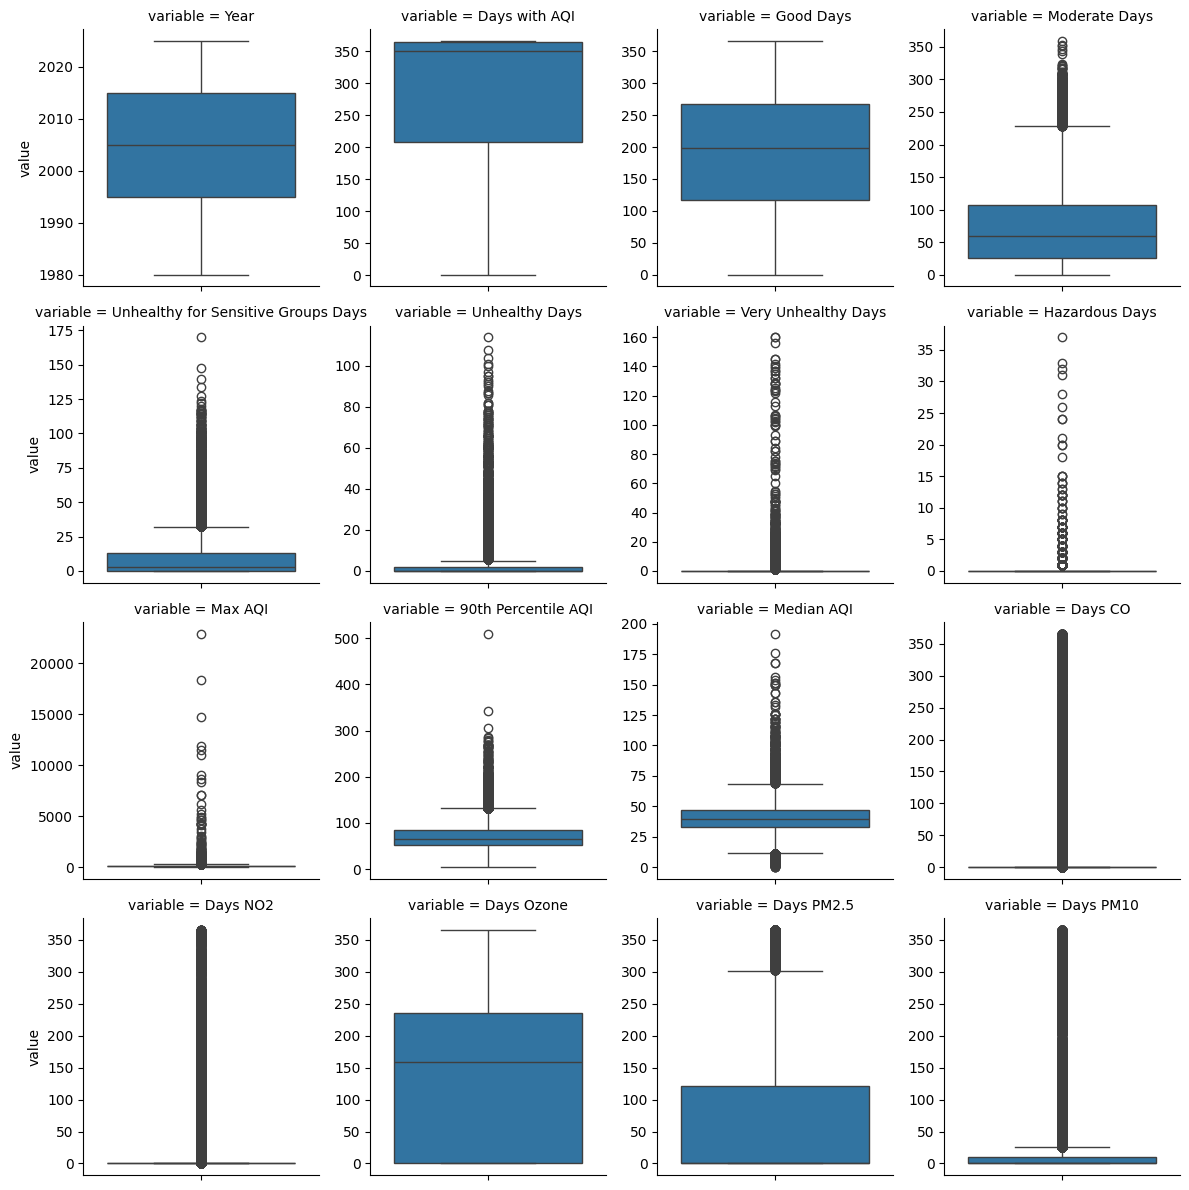

In [10]:
df_long = df[num_cols].melt(var_name="variable", value_name="value")

g = sns.FacetGrid(df_long, col="variable", col_wrap=4, sharey=False, height=3)
g.map_dataframe(sns.boxplot, y="value")

for ax in g.axes.flatten():
    title = ax.get_title() 
    ax.set_yscale("linear") 
    ax.ticklabel_format(style="plain", axis="y", useOffset=False)
    ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
g.tight_layout()
plt.show()


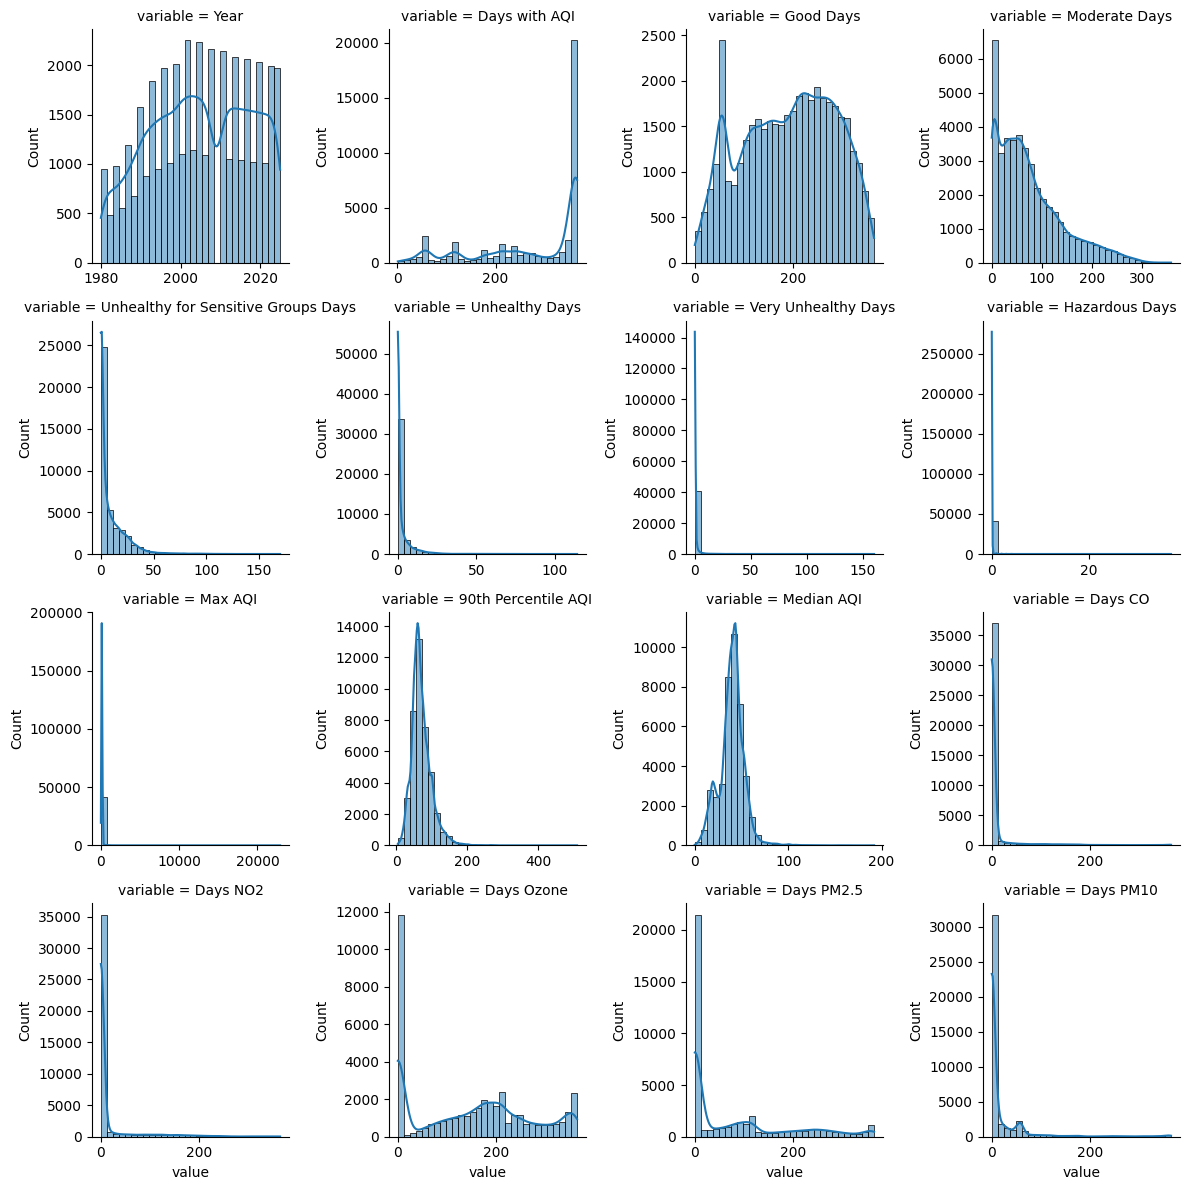

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = df.select_dtypes(include="number").columns

df_long = df[num_cols].melt(var_name="variable", value_name="value")

g = sns.FacetGrid(
    df_long,
    col="variable",
    col_wrap=4,
    sharex=False,
    sharey=False,
    height=3
)

g.map_dataframe(
    sns.histplot,
    x="value",
    bins=30,
    kde=True
)


g.tight_layout()
plt.show()



Columns such as Unhealthy Days, Very Unhealthy Days, Hazardous Days, as well as Days CO, NO2, PM2.5, and PM10 show strong right-skewness and zero inflation. Most county-year observations have values close to zero, while a small number of counties exhibit extremely high values, forming long right tails.

This pattern suggests that air pollution exposure is not evenly distributed across counties. Severe pollution events tend to be concentrated in specific locations, likely driven by geographic factors (such as wildfire-prone regions or basins with poor air circulation) and localized emission sources, including industrial activity and dense urban traffic.

## Days with AQI Converage filter

Days with AQI is left-skewed because most counties have near-complete yearly AQI coverage, while a small number have fewer recorded days. Since this variable reflects data availability rather than pollution severity, it does not require transformation and is primarily used as a normalization denominator rather than an outcome of interest.

In [12]:
df["Days with AQI"].describe()


,Days with AQI
count,41447.000000
mean,278.129877
std,110.182517
min,1.000000
25%,209.000000
50%,351.000000
75%,365.000000
max,366.000000


County-year observations with fewer than 300 recorded AQI days were excluded to ensure stable percentage-based metrics. Since most counties have near-complete annual AQI coverage, observations with very low coverage likely reflect data availability issues rather than true air quality conditions.

In [13]:
df = df[df["Days with AQI"] >= 209]


In [14]:
df["Days with AQI"].describe()


,Days with AQI
count,31173.000000
mean,334.184326
std,49.309307
min,209.000000
25%,324.000000
50%,362.000000
75%,365.000000
max,366.000000


In [15]:
df.shape

(31173, 18)

To ensure stable rate-based comparisons, we excluded county-year observations in the lowest quartile of AQI data coverage (Days with AQI < 209). These observations likely reflect incomplete monitoring rather than true air quality conditions. The remaining dataset retains over 75% of observations with near-complete annual AQI coverage.

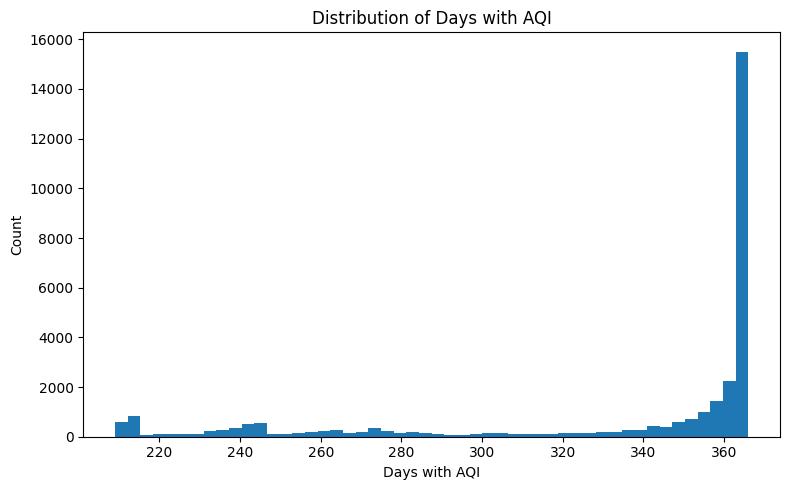

In [16]:
plt.figure(figsize=(8, 5))
plt.hist(df["Days with AQI"], bins=50)
plt.xlabel("Days with AQI")
plt.ylabel("Count")
plt.title("Distribution of Days with AQI")
plt.tight_layout()
plt.show()


## Days with AQI value match

In [17]:
cols = [
    "Good Days",
    "Moderate Days",
    "Unhealthy for Sensitive Groups Days",
    "Unhealthy Days",
    "Very Unhealthy Days",
    "Hazardous Days",
]

(df[cols].sum(axis=1) != df["Days with AQI"]).sum()


np.int64(0)

Sum of all the days equal to Days with AQI so the column match

## MAX AQI Outlier

In [18]:
df["Max AQI"].describe()


,Max AQI
count,31173.000000
mean,154.609630
std,272.479644
min,6.000000
25%,102.000000
50%,140.000000
75%,179.000000
max,22897.000000


In [19]:
df.nlargest(10, "Max AQI")[
    [
        "State",
        "County",
        "Year",
        "Max AQI",
        "90th Percentile AQI",
        "Median AQI",
    ]
]


,State,County,Year,Max AQI,90th Percentile AQI,Median AQI
75,California,Inyo,2001,22897,184,58
6432,California,Inyo,2003,18304,132,51
11410,California,Inyo,2011,14703,105,54
16764,California,Inyo,2000,11880,126,50
16776,California,Mono,2000,11464,31,11
10338,California,Mono,2007,10968,66,18
23106,California,Inyo,2006,9055,115,51
14592,California,Inyo,2002,8628,158,60
9324,California,Mono,2022,8368,68,27
4781,California,Mono,2016,7063,63,18


The highest Max AQI values are concentrated in Inyo and Mono counties in California around 2001. According to historical records, this period coincides with major California wildfire events. These extreme AQI values therefore reflect real wildfire-driven pollution episodes rather than data errors. Instead of removing these observations, which would discard meaningful extreme exposure events, we apply a log1p transformation to Max AQI to reduce skewness and limit the influence of extreme values while preserving the underlying signal.

In [20]:

df["log_max_aqi"] = np.log1p(df["Max AQI"])

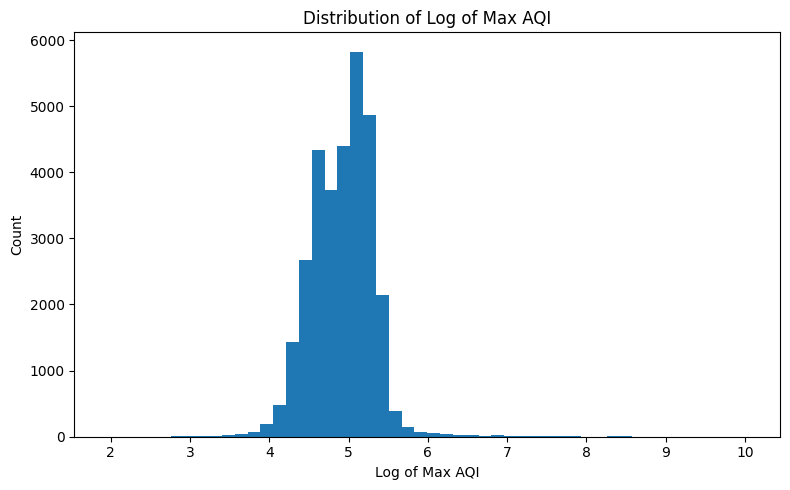

In [21]:
plt.figure(figsize=(8, 5))
plt.hist(df["log_max_aqi"], bins=50)
plt.xlabel("Log of Max AQI")
plt.ylabel("Count")
plt.title("Distribution of Log of Max AQI")
plt.tight_layout()
plt.show()


## 90th Percentile AQI

In [22]:
df.columns

Index(['State', 'County', 'Year', 'Days with AQI', 'Good Days',
       'Moderate Days', 'Unhealthy for Sensitive Groups Days',
       'Unhealthy Days', 'Very Unhealthy Days', 'Hazardous Days', 'Max AQI',
       '90th Percentile AQI', 'Median AQI', 'Days CO', 'Days NO2',
       'Days Ozone', 'Days PM2.5', 'Days PM10', 'log_max_aqi'],
      dtype='object')

In [23]:
df["90th Percentile AQI"].describe()


,90th Percentile AQI
count,31173.000000
mean,74.291085
std,26.821324
min,4.000000
25%,57.000000
50%,68.000000
75%,87.000000
max,305.000000


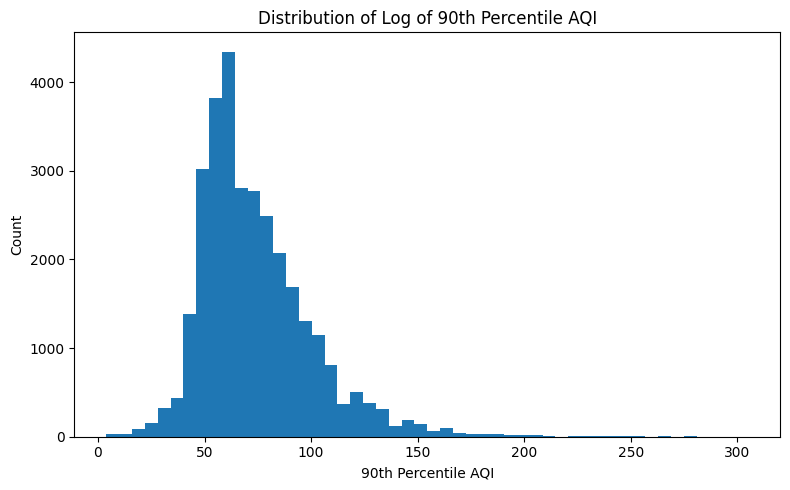

In [24]:
plt.figure(figsize=(8, 5))
plt.hist(df["90th Percentile AQI"], bins=50)
plt.xlabel("90th Percentile AQI")
plt.ylabel("Count")
plt.title("Distribution of Log of 90th Percentile AQI")
plt.tight_layout()
plt.show()


The distribution of 90th percentile AQI is moderately right-skewed but does not exhibit extreme outliers. As this metric is already robust to short-lived pollution spikes, we retain it in its original scale and apply transformations only to Max AQI, which is more sensitive to episodic wildfire events.

## State County coverage

To ensure data reliability while avoiding excessive exclusion, we applied a multi-stage data cleaning strategy.

In [25]:
state_counts = df.groupby("State").size().sort_values()

state_counts.head(10)


,0
State,
Canada,4
Virgin Islands,7
District Of Columbia,44
Country Of Mexico,52
Rhode Island,99
Delaware,112
Vermont,117
Hawaii,118
Puerto Rico,167


In [26]:
county_counts = df.groupby(["State", "County"]).size().sort_values()

county_counts.head(10)


State      County     
Wyoming    Washakie       1
Alabama    Walker         1
Wisconsin  Oconto         1
           Chippewa       1
           Douglas        1
Kansas     Pawnee         1
Kentucky   Calloway       1
Indiana    Switzerland    1
Arkansas   Sebastian      1
           Van Buren      1
dtype: int64

In [27]:
county_years = df.groupby(["State", "County"])["Year"].nunique().sort_values()

county_years.head(10)


State      County     
Wyoming    Washakie       1
Alabama    Walker         1
Wisconsin  Oconto         1
           Chippewa       1
           Douglas        1
Kansas     Pawnee         1
Kentucky   Calloway       1
Indiana    Switzerland    1
Arkansas   Sebastian      1
           Van Buren      1
Name: Year, dtype: int64

In [28]:
county_years.describe()


,Year
count,1239.000000
mean,25.159806
std,14.869664
min,1.000000
25%,12.000000
50%,26.000000
75%,39.500000
max,45.000000


First, we removed non-U.S. observations (e.g., Canada, Mexico) due to incompatible monitoring systems.

In [29]:
drop_states = ["Canada", "Country Of Mexico", "Virgin Islands"]

df = df[~df["State"].isin(drop_states)]


Second, counties with fewer than three years of AQI records were excluded, as such sparse coverage does not allow for stable temporal analysis.

In [30]:
county_years = df.groupby(["State", "County"])["Year"].nunique()

valid_counties = county_years[county_years >= 3].index

df = df.set_index(["State", "County"]).loc[valid_counties].reset_index()


# Feature Engineer

In [31]:
df.columns

Index(['State', 'County', 'Year', 'Days with AQI', 'Good Days',
       'Moderate Days', 'Unhealthy for Sensitive Groups Days',
       'Unhealthy Days', 'Very Unhealthy Days', 'Hazardous Days', 'Max AQI',
       '90th Percentile AQI', 'Median AQI', 'Days CO', 'Days NO2',
       'Days Ozone', 'Days PM2.5', 'Days PM10', 'log_max_aqi'],
      dtype='object')

These features convert the number of days in each AQI category into proportions relative to the total number of monitored days. This normalization makes AQI severity comparable across counties and years with different monitoring coverage.

In [32]:
severity_cols = [
    "Good Days",
    "Moderate Days",
    "Unhealthy for Sensitive Groups Days",
    "Unhealthy Days",
    "Very Unhealthy Days",
    "Hazardous Days",
]

for c in severity_cols:
    df[f"pct_{c.lower().replace(' ', '_')}"] = df[c] / df["Days with AQI"]


`pct_unhealthy_plus` captures the share of days with clearly harmful air quality by aggregating Unhealthy, Very Unhealthy, and Hazardous days. It provides a concise measure of high-risk pollution exposure.

In [33]:
df["pct_unhealthy_plus"] = (
    df["Unhealthy Days"] + df["Very Unhealthy Days"] + df["Hazardous Days"]
) / df["Days with AQI"]


These ratio-based features describe how extreme pollution events compare to typical air quality levels. Higher values indicate sharper pollution spikes, which are often associated with episodic events such as wildfires.

In [34]:
df["max_to_median"] = np.where(
    df["Median AQI"] > 0, df["Max AQI"] / df["Median AQI"], np.nan
)

df["p90_to_median"] = np.where(
    df["Median AQI"] > 0, df["90th Percentile AQI"] / df["Median AQI"], np.nan
)

For counties with Median AQI equal to zero,  `Max/Median`, `P90/Median` were treated as missing values to avoid
artificially inflated pollution intensity signals.

These features represent the proportion of days in which each pollutant dominated the AQI calculation. Using proportions instead of raw counts allows meaningful comparison of pollution composition across counties and years.

In [35]:
pollutant_cols = [
    "Days CO",
    "Days NO2",
    "Days Ozone",
    "Days PM2.5",
    "Days PM10",
]

for c in pollutant_cols:
    df[f"pct_{c.lower().replace(' ', '_')}"] = df[c] / df["Days with AQI"]


In [36]:
df.columns

Index(['State', 'County', 'Year', 'Days with AQI', 'Good Days',
       'Moderate Days', 'Unhealthy for Sensitive Groups Days',
       'Unhealthy Days', 'Very Unhealthy Days', 'Hazardous Days', 'Max AQI',
       '90th Percentile AQI', 'Median AQI', 'Days CO', 'Days NO2',
       'Days Ozone', 'Days PM2.5', 'Days PM10', 'log_max_aqi', 'pct_good_days',
       'pct_moderate_days', 'pct_unhealthy_for_sensitive_groups_days',
       'pct_unhealthy_days', 'pct_very_unhealthy_days', 'pct_hazardous_days',
       'pct_unhealthy_plus', 'max_to_median', 'p90_to_median', 'pct_days_co',
       'pct_days_no2', 'pct_days_ozone', 'pct_days_pm2.5', 'pct_days_pm10'],
      dtype='object')

| Column Name                                   | Description |
|----------------------------------------------|-------------|
| pct_good_days                                | Proportion of monitored days with Good AQI. |
| pct_moderate_days                            | Proportion of monitored days with Moderate AQI. |
| pct_unhealthy_for_sensitive_groups_days      | Proportion of days unhealthy for sensitive groups. |
| pct_unhealthy_days                           | Proportion of days classified as Unhealthy. |
| pct_very_unhealthy_days                      | Proportion of days classified as Very Unhealthy. |
| pct_hazardous_days                           | Proportion of days classified as Hazardous. |
| pct_unhealthy_plus                           | Share of days with Unhealthy AQI or worse. |
| max_to_median                                | Ratio of maximum AQI to median AQI, capturing pollution spikes. |
| p90_to_median                                | Ratio of 90th percentile AQI to median AQI. |
| pct_days_co                                  | Proportion of days dominated by CO pollution. |
| pct_days_no2                                 | Proportion of days dominated by NO₂ pollution. |
| pct_days_ozone                               | Proportion of days dominated by Ozone pollution. |
| pct_days_pm2.5                               | Proportion of days dominated by PM2.5 pollution. |
| pct_days_pm10                                | Proportion of days dominated by PM10 pollution. |


In [37]:
df.to_csv(f"{DATA_DIR}/cleaned_data.csv", index=False)


In [ ]:
df.head()